In [ ]:
#Import all libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from scipy.stats import boxcox

In [ ]:
#load data and view first 5 rows
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
dataset.shape

(10000, 14)

In [ ]:
dataset = dataset.drop(labels=['Surname', 'Tenure'], axis=1)

In [ ]:
dataset.head(5)

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,France,Female,42,0.00,1,1,1,101348.88,1
1,2,15647311,608,Spain,Female,41,83807.86,1,0,1,112542.58,0
2,3,15619304,502,France,Female,42,159660.80,3,1,0,113931.57,1
3,4,15701354,699,France,Female,39,0.00,2,0,0,93826.63,0
4,5,15737888,850,Spain,Female,43,125510.82,1,1,1,79084.10,0


In [ ]:
print("Missing values in the train dataset:\n\n",dataset.isna().sum())


Missing values in the train dataset:

 RowNumber          0
CustomerId         0
CreditScore        0
Geography          0
Gender             0
Age                0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [ ]:
#create a list of categorical features
list_of_cat_features = dataset[['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']]  
palette_features = ['#E68753', '#409996']

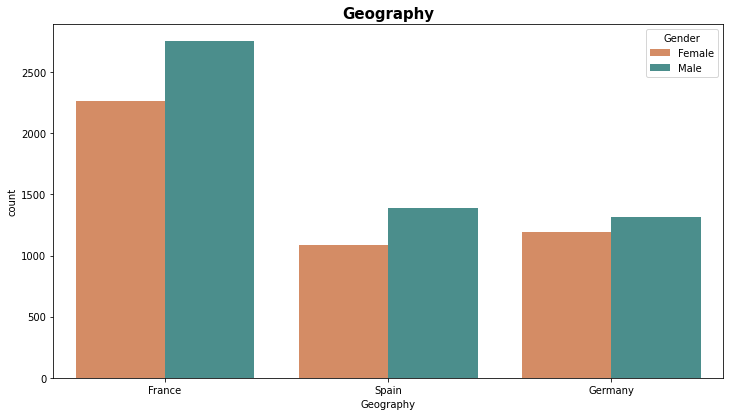

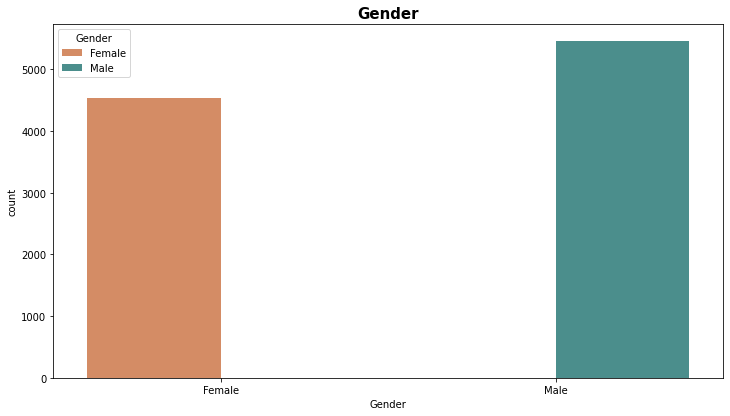

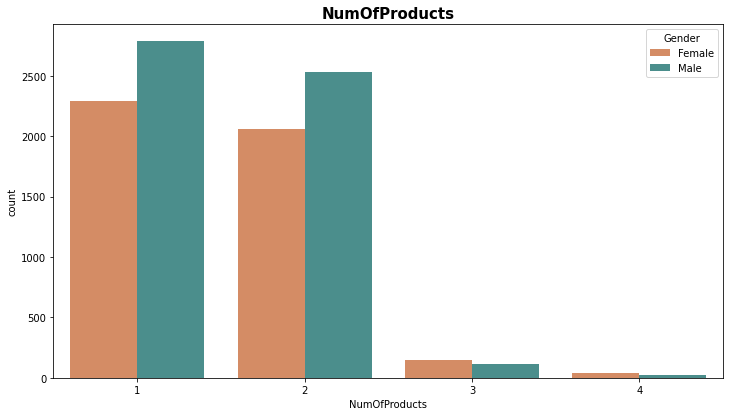

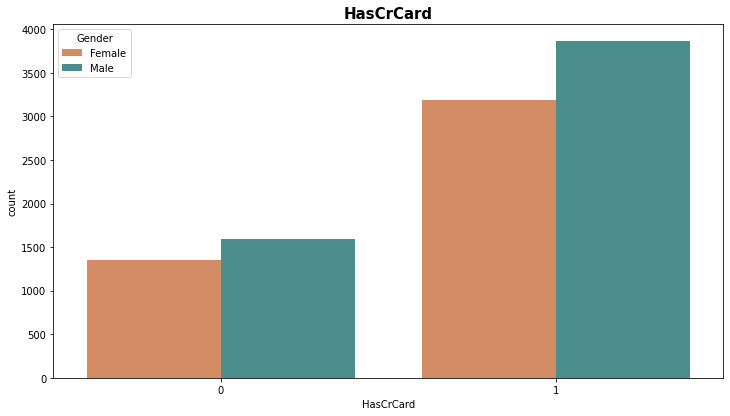

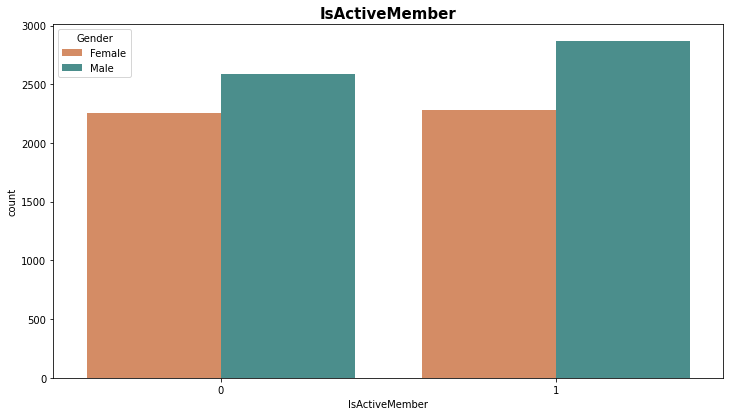

In [ ]:
for feature in list_of_cat_features:
    plt.figure(figsize=(12,6.5)) 
    plt.title(feature, fontsize=15, fontweight='bold', fontname='Arial Black', ha='center')
    ax = sns.countplot(x = list_of_cat_features[feature], hue = 'Gender', data = dataset, palette=palette_features)

In [ ]:
list_of_num_features = dataset[['Age', 'CreditScore', 'Balance', 'EstimatedSalary']]  
palette_features = ['#E68753', '#409996']



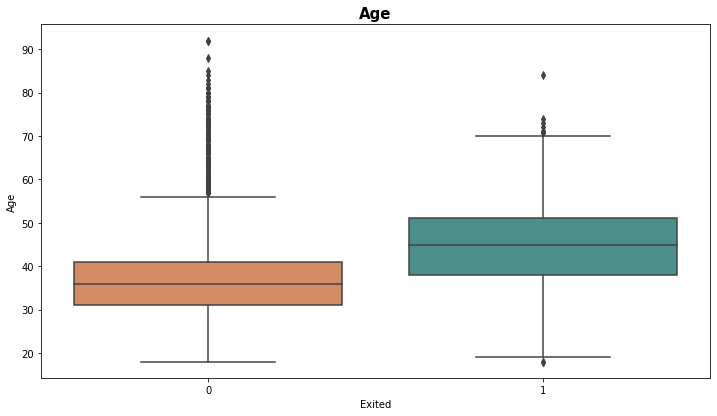

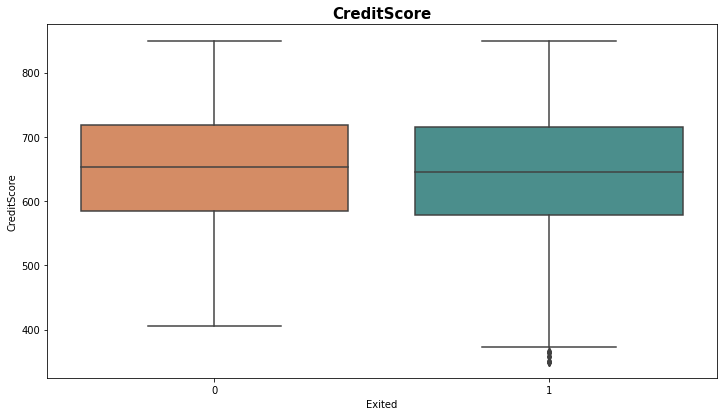

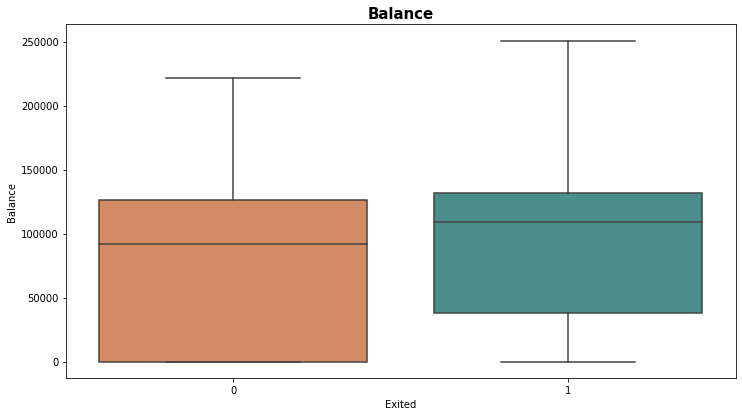

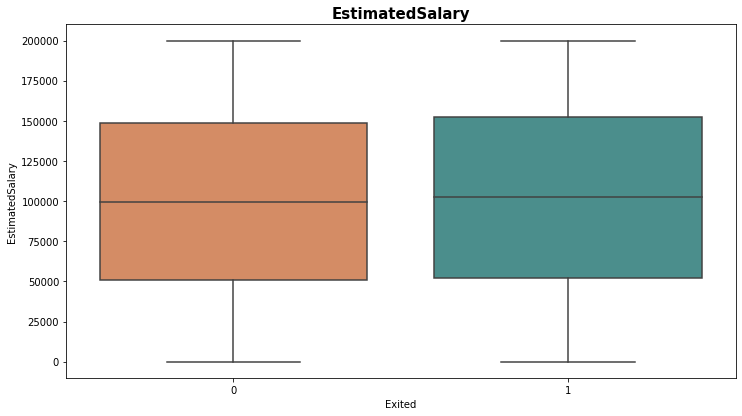

In [ ]:
for feature in list_of_num_features:
    plt.figure(figsize=(12,6.5)) 
    plt.title(feature, fontsize=15, fontweight='bold', fontname='Arial Black', ha='center')
    ax = sns.boxplot(x = dataset['Exited'], y = list_of_num_features[feature], data = dataset, palette=palette_features)
